# **Análisis Exploratorio y Transformacion de Datos**

El notebook que se presenta a continuación corresponde a todo el análisis y transformación de datos que se realizó previo al entrenamiento del modelo de Machine Learning solicitado por el cliente. Desde un principio, el departamento de datos advirtió que habían algunos problemas de calidad de datos, por lo que el análisis se hizo a profundidad identificando outliers y ejecutando todos los cambios necesarios.

## **Utilidades**

Para el análisis se crearon unas funciones que facilitaron las transformaciones y visualización de los datos. Todas estas funciones se encuentran disponibles en el archivo utils.py en la raíz del repositorio del proyecto.

## **Carga de Datos y Librerías Necesarias**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import Utils as tl
import json

df = pd.read_excel('./src/BBDD_Hospitalizacion.xlsx')

/home/rickhersd2002/.pyenv/versions/3.11.4/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## **Análisis General**

Se comenzó analizando el dataset a nivel general identificando valores nulos y renombrando las columnas.

### **Previsualización del Dataset**

In [25]:
df.head(5)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


### **Tipos de Datos**

In [26]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print('Número de columnas numéricas:', numeric_data.shape[1])
print('Número de columnas categóricas:', categorical_data.shape[1])

Número de columnas numéricas: 5
Número de columnas categóricas: 15


El dataset estaba compuesto principalmente por columnas categóricas, dando un total de 15 variables categóricas y 5 numéricas.

### **Formateo y Renombrado de Columnas**

Las columnas estaban identificadas con nombres poco prácticos para el análisis, por lo que se formatearon a partir de las siguientes pautas:

- Se cambiaron los espacios en blanco por guiones bajos "_",
- Se cambió la codificación de los nombres para eliminar tildes o carácteres extraños.
- Se capitalizaron los nombres.
- Se eliminaron espacios en blancos adicionales al inicio y al final, de haberlos.

Para realizar el formateo se uso la función "format_text" dentro de utils.py.

In [27]:
prev_col_names = list(df.columns)
cols_name_dict = {}

for prev_name in prev_col_names:
  new_name = tl.format_text(prev_name)
  cols_name_dict[prev_name] = new_name

df = df.rename(columns = cols_name_dict)

En algunos casos, también se renombraron aquellas columnas con nombres muy largos o mal escritos.

In [28]:
cols_to_rename = {
  'Antibiotico_utiliazado_en_la_profilaxis' : 'Antibiotico_en_profilaxis',
  'Numero_de_muestras_tomadas':'N_Muestras',
  'Enf._cronica_pulmonar_obstructiva' : 'EPOC' ,
  'Numero_de_dias_post_biopsia_en_que_se_presenta_la_complicacion_infecciosa': 'N_dias_hasta_comp_infecciosa'
}
df = df.rename(columns = cols_to_rename)

### **Datos Faltantes**

El dataset mostró datos faltantes en todas sus columnas.

In [29]:
df.isna().sum()

Edad                             2
Diabetes                         2
Hospitalizacion_ultimo_mes       2
Psa                              6
Biopsias_previas                 4
Volumen_prostatico               3
Antibiotico_en_profilaxis        2
N_Muestras                       2
Cup                              3
EPOC                             4
Biopsia                          2
N_dias_hasta_comp_infecciosa     2
Fiebre                           2
Itu                              2
Tipo_de_cultivo                  2
Agente_aislado                  19
Patron_de_resistencia            2
Hospitalizacion                  5
Dias_hospitalizacion_mq          2
Dias_hospitalizacion_upc         2
dtype: int64

Para tener un contexto más claro de como se distribuyen los valores nulos, la siguiente tabla los agrupa de acuerdo al índice del registro.

In [30]:
pd.Series(tl.get_null_dict(df))

9                                                  [Psa]
26                                      [Agente_aislado]
31                                     [Hospitalizacion]
76                                                 [Psa]
92                                    [Biopsias_previas]
99                                      [Agente_aislado]
100                                    [Hospitalizacion]
103                                                [Psa]
106                                     [Agente_aislado]
109                                    [Hospitalizacion]
115                                     [Agente_aislado]
116                                     [Agente_aislado]
121                                                [Psa]
126                                     [Agente_aislado]
128                                     [Agente_aislado]
129                                     [Agente_aislado]
130                                     [Agente_aislado]
138                            

En los registros "568" y "569", todos los valores eran nulos, por lo que se eliminaron del dataset.

In [31]:
rows_to_drop = [568, 569]
tl.df_drop(df, rows_to_drop)

Por otro lado, se pudo ver que el resto de los valores nulos se distribuyeron de la siguiente manera: un valor nulo por registro. Esto es contraproducente, puesto que por cada registro, se podría perder información relavante en caso de eliminarse.

Sin embargo, como el dataset es un informe médico en el que la mayoría de valores nulos corresponden a variables categóricas, resultó díficil imputar los datos apropiadamente. Por lo tanto, para corregir esto, se evaluó el balance de la variable objetivo.

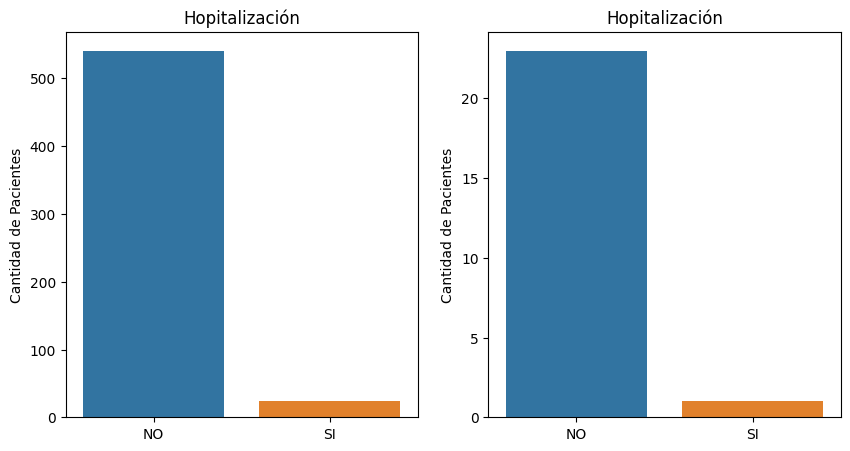

In [32]:
data_plot = tl.get_grouped_values(df, 'Hospitalizacion')
data_plot_null = tl.get_grouped_values(df.iloc[list(tl.get_null_dict(df)), :], 'Hospitalizacion')
fig, ax = plt.subplots(1, 2,  figsize=(10, 5))

ax[0].set_title('Hopitalización')
sns.barplot(ax=ax[0], data=data_plot, x='Hospitalizacion', y='count')
ax[0].set(ylabel='Cantidad de Pacientes', xlabel='')

ax[1].set_title('Hopitalización')
sns.barplot(ax=ax[1],  data=data_plot_null, x='Hospitalizacion', y='count')
ax[1].set(ylabel='Cantidad de Pacientes', xlabel='')

plt.show()

Se pudo apreciar en las distribuciones anteriores, que el dataset está desbalaceado para la variable objetivo, y que casi todos los registros corresponden a pacientes no hospitalizados.

Por suerte, la proporción es la misma para ambas gráficas, indicando que la mayoría de registros con valores nulos son para pacientes no hospitalizados, por lo que eliminar estos registros no significará una pérdida de la categoría minoritaria.

In [33]:
tl.df_drop(df, list(tl.get_null_dict(df)))

Tras esto, se evaluó nuevamente el número de registros vacíos y los cambios se efectuaron correctamente.

In [34]:
df.isna().sum()

Edad                            0
Diabetes                        0
Hospitalizacion_ultimo_mes      0
Psa                             0
Biopsias_previas                0
Volumen_prostatico              0
Antibiotico_en_profilaxis       0
N_Muestras                      0
Cup                             0
EPOC                            0
Biopsia                         0
N_dias_hasta_comp_infecciosa    0
Fiebre                          0
Itu                             0
Tipo_de_cultivo                 0
Agente_aislado                  0
Patron_de_resistencia           0
Hospitalizacion                 0
Dias_hospitalizacion_mq         0
Dias_hospitalizacion_upc        0
dtype: int64

## **Análisis: Variables Numéricas**

EL dataset posee cinco variables numéricas:  Edad, Psa, N_Muestras, Dias_hospitalizacion_mq y Dias_hospitalizacion_upc.

In [35]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.head(5)

,Edad,Psa,N_Muestras,Dias_hospitalizacion_mq,Dias_hospitalizacion_upc
0,53.0,4.0,12.0,2.0,0.0
1,56.0,7.7,12.0,5.0,0.0
2,57.0,29.0,24.0,4.0,3.0
3,56.0,7.0,12.0,5.0,0.0
4,55.0,29.0,24.0,4.0,3.0


In [36]:
df_numeric.describe()

,Edad,Psa,N_Muestras,Dias_hospitalizacion_mq,Dias_hospitalizacion_upc
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,63.879852,13.391257,12.987061,0.168207,0.014787
std,9.389434,15.946475,3.942858,0.973437,0.201300
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


<Axes: xlabel='Dias_hospitalizacion_upc', ylabel='Count'>

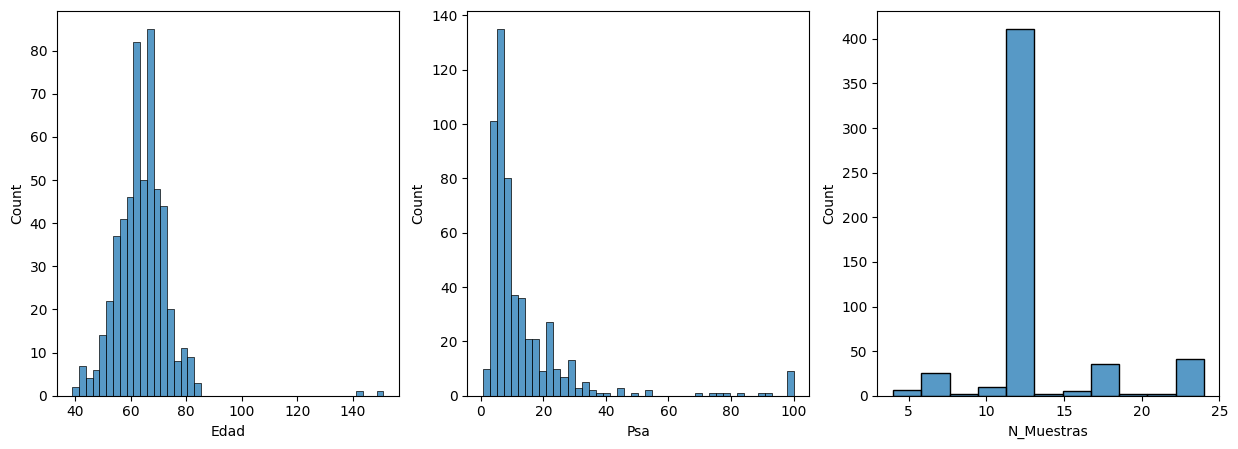

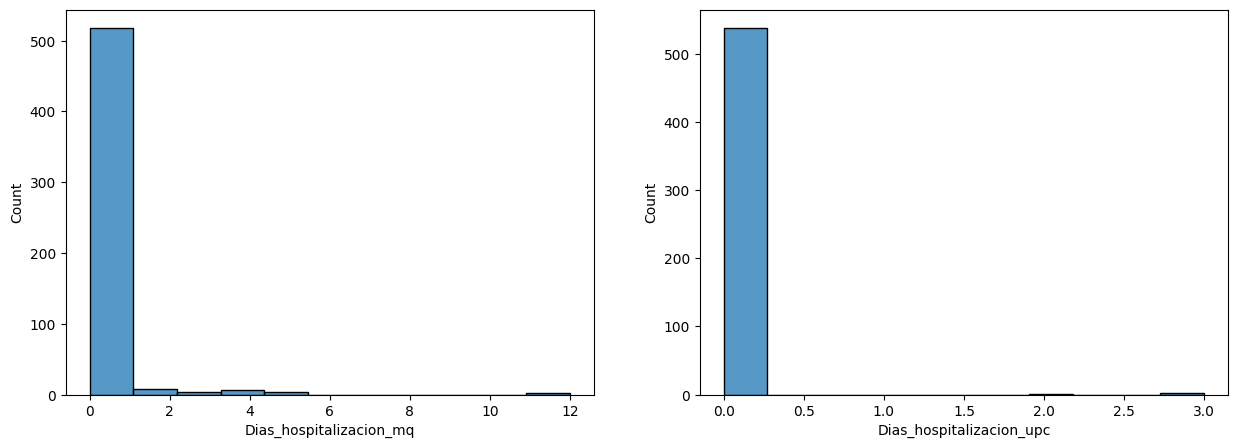

In [37]:
fig, ax = plt.subplots(1, 3,  figsize=(15, 5))

sns.histplot(ax=ax[0], data=df_numeric.Edad)
sns.histplot(ax=ax[1], data=df_numeric.Psa)
sns.histplot(ax=ax[2], data=df_numeric.N_Muestras)

fig, ax2 = plt.subplots(1, 2,  figsize=(15, 5))

sns.histplot(ax=ax2[0], data=df_numeric.Dias_hospitalizacion_mq)
sns.histplot(ax=ax2[1], data=df_numeric.Dias_hospitalizacion_upc)

### **Edad**

Se encontraron dos pacientes con edades mayores a 140 años que son claros outilers. Estos no fueron hospitalizados como se ve en la tabla de abajo.

In [38]:
df[df["Edad"] > 100][['Edad', 'Hospitalizacion']]

,Edad,Hospitalizacion
161,143.0,NO
181,151.0,NO


Por lo tanto, se eliminaron en lugar de hacer algún cambio en la edad.

In [39]:
rows_to_drop = [161, 181]
tl.df_drop(df, rows_to_drop)

### **Psa**

Como en la distribución se puede apreciar valores muy alejados de donde se distrubuyen la mayoría de valores, para este campo se decidió hacer una investigacion previa de los datos de la columna.

De acuerdo al Instituto Nacional del Cáncer
de los Institutos Nacionales de la Salud, "El antígeno prostático específico o PSA es una proteína que producen tanto las células normales como las células malignas (cancerosas) de la próstata. La prueba del PSA se usa para medir la concentración del PSA en la sangre. Los resultados en general se indican en nanogramos de PSA por mililitro de sangre (ng/ml).

Por otro lado, se pueden tomar en cosideración los siguientes rangos de valores para saber la gravedad del nivel de PSA:

- **Valor menor a 2,5 ng/ml**: PSA normal en pacientes menores de 50 años.

- **PSA normal, menor de 4 ng/ml**: Es el valor de referencia utilizado como «estándar» en la mayoría de centros. Este nivel de PSA es de bajo riesgo, es decir, la presencia de cáncer es poco probable.

- **Valor límite, de 4 a 10 ng/ml**: Se trata de un valor límite que debe interpretarse según el contexto clínico. Estos pacientes tienen entre 30% a 50% mayor probabilidad de tener cancer.

Con esta informacion presente, se procedió a calcular posibles outlier a partir del rango intercuartil de la variable.

Numero de outliers:  20 



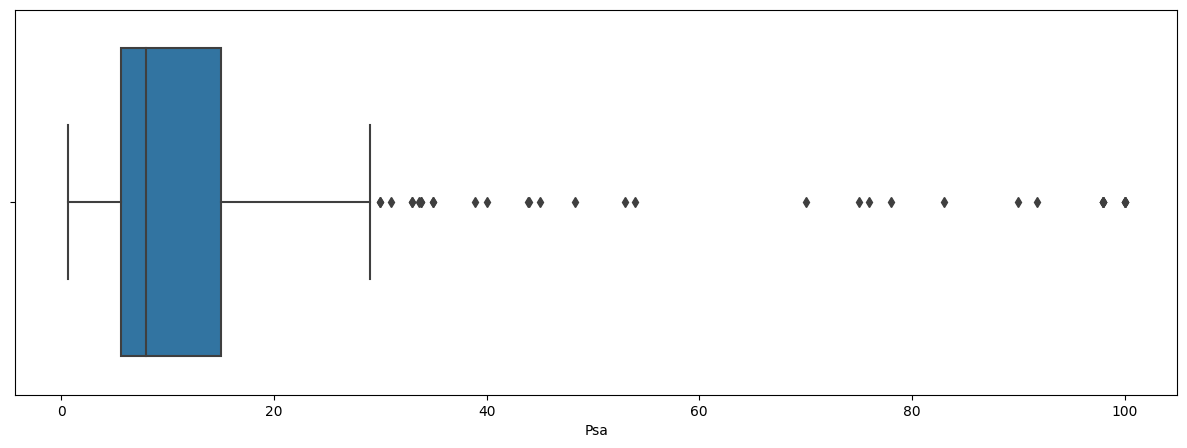

In [46]:
from scipy import stats

def get_outliers(df, column):
  data = df[column]

  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr

  outliers = [(data < int(lower_bound)) | (data > int(upper_bound))]
  z_scores = np.abs(stats.zscore(data))
  threshold = 1.96
  outliers = data[z_scores > threshold]

  return outliers

outliers = get_outliers(df, 'Psa')
print("Numero de outliers: ", outliers.count(), '\n')

plt.figure(figsize=(15,5))
sns.boxplot(x=df["Psa"])
plt.show()

De acuerdo al gráfico, pacientes con valores mayores a 29  podrían ser Outliers. Y tras hacer una investigacion sobre estos valores, se encontró que si son posibles niveles de PSA mayores a este límite, incluso llegando a caber la posibilidad de valores cercanos a 100 en pacientes muy específicos, en donde ya se ha detectado la presencia de Cáncer de Próstata.

En este sentido, se verificó la prueba de Biopsia para los pacientes considerados outliers con valores del PSA mayores a 60. Se consideraron solo estos, por que de acuerdo al gráfico, hay una brecha muy grande entre los valores menores y mayores a 60.

In [47]:
df[df["Psa"] > 60][['Psa', "Biopsia", 'Hospitalizacion']]

,Psa,Biopsia,Hospitalizacion
27,91.8,ADENOCARCINOMA GLEASON 10,NO
29,98.0,ADENOCARCINOMA GLEASON 10,NO
34,90.0,ADENOCARCINOMA GLEASON 9,NO
40,100.0,ADENOCARCINOMA GLEASON 9,NO
77,98.0,ADENOCARCINOMA GLEASON 9,NO
111,98.0,ADENOCARCINOMA GLEASON 8,NO
114,100.0,ADENOCARCINOMA GLEASON 8,NO
175,83.0,ADENOCARCINOMA GLEASON 6,NO
274,76.0,ADENOCARCINOMA GLEASON 8,NO
304,70.0,ADENOCARCINOMA GLEASON 8,NO


La tabla muestra como los pacientes con un PSA mayor a 60 resultaron con ADENOCARCINOMA GLEASON 8	- 10 al hacer la Biopsia, lo que implica la más agresiva y potencialmente letal forma de cáncer de próstata. Esto puede explicar el porqué de los resultados tan altos de PSA. Únicamente los pacientes 432 y 175 tuvieron ADENOCARCINOMA GLEASON 6, lo que no corresponde a sus valores de PSA tan Altos. Este tipo refleja células normales, que no se consideran especialmente agresivas.

Al final se eliminaron únicamente los registros 432 y 175 del dataset por lo antes descrito. 

In [ ]:
row_to_drop = [432, 175]
df_drop(df, row_to_drop)

### **Días de Hospitalización con Médico Quirúrgico y Días de Hospitalización en Estado Crítico**

Las columnas 'Dias_hospitalizacion_mq' y 'Dias_hospitalizacion_upc' fueron eliminadas del dataset, puesto que son datos que se obtienen a partir de eventos posteriores al comienzo de la hospitalización del paciente.

In [48]:
tl.df_drop(df,['Dias_hospitalizacion_mq', 'Dias_hospitalizacion_upc'], axis=1)

## **Análisis: Variables Categóricas**

Para realizar el análisis, primero se formatearon todas las valores categóricas como se hizo con el nombre de las columnas, para posteriormente revisar cada variable categórica y hacer los cambios necesarios.

In [50]:
categorical_cols = list(df.select_dtypes(exclude=[np.number]).columns)

for col_name in categorical_cols:
  df[col_name] = df[col_name].map(lambda x: tl.format_text(x))

### **Antibiótico en Profilaxis**

In [51]:
tl.get_grouped_values(df, 'Antibiotico_en_profilaxis')

,Antibiotico_en_profilaxis,count
0,Cefalosporina_aminoglucocido,55
1,Fluoroquinolona_aminoglicosido,427
2,Oroquinolonas,17
3,Otros,40


### **Tipo de Cultivo**

In [52]:
tl.get_grouped_values(df, 'Tipo_de_cultivo')

,Tipo_de_cultivo,count
0,Hemocultivo,2
1,Hemocultivo_y_urocultivo,2
2,No,531
3,Urocultivo,4


### **Biopsia**

In [53]:
tl.get_grouped_values(df, 'Biopsia')

,Biopsia,count
0,Adenocarcinoma_gleason_10,4
1,Adenocarcinoma_gleason_6,54
2,Adenocarcinoma_gleason_7,109
3,Adenocarcinoma_gleason_8,21
4,Adenocarcinoma_gleason_9,20
5,Carcinoma_indiferenciado_de_celulas_claras,2
6,Hiperplasia_prostatica,13
7,Neg,302
8,Prostatitis,14


### **Agente Aislado**

In [54]:
tl.get_grouped_values(df, 'Agente_aislado')

,Agente_aislado,count
0,E.coli,6
1,No,531
2,Pseudomonas_aeruginosa,2


### **Patrón de Resistencia**

In [55]:
tl.get_grouped_values(df, 'Patron_de_resistencia')

,Patron_de_resistencia,count
0,"Ampi_r,_cipro_r,_genta_r,_sulfa_m_r",1
1,Multi_sensible,2
2,No,532
3,"Resistente_a_ampi,_cipro_y_genta",2
4,"Resistente_a_ampi,_sulfa,_cefadroxilo,_cefurox...",2


### **Hospitalización Último Mes**

In [56]:
tl.get_grouped_values(df, 'Hospitalizacion_ultimo_mes')

,Hospitalizacion_ultimo_mes,count
0,No,534
1,Si,5


### **Diabetes**

In [57]:
tl.get_grouped_values(df, 'Diabetes')

,Diabetes,count
0,No,477
1,Si,62


### **Biopsias Previas**

In [58]:
tl.get_grouped_values(df, 'Biopsias_previas')

,Biopsias_previas,count
0,No,487
1,Si,52


### **Volumen Prostático**

In [ ]:
get_grouped_values(df, 'Volumen_prostatico')

,Volumen_prostatico,count
0,No,151
1,Si,386


### **Cup**

In [59]:
tl.get_grouped_values(df, 'Cup')

,Cup,count
0,No,535
1,Si,4


### **EPOC**

In [60]:
tl.get_grouped_values(df, 'EPOC')

,EPOC,count
0,No,521
1,Si,12
2,"Si,_asma",3
3,"Si,_epoc",3


### **Número de Días hasta Complicación Infecciosa**

In [61]:
tl.get_grouped_values(df, 'N_dias_hasta_comp_infecciosa')

,N_dias_hasta_comp_infecciosa,count
0,1,5
1,2,8
2,3,8
3,5,2
4,9,2
5,No,514


### **Fiebre**

In [62]:
tl.get_grouped_values(df, 'Fiebre')

,Fiebre,count
0,No,503
1,Si,36


### **Itu**

In [63]:
tl.get_grouped_values(df, 'Itu')

,Itu,count
0,No,533
1,Si,6


### **Hospitalización**

In [64]:
tl.get_grouped_values(df, 'Hospitalizacion')

,Hospitalizacion,count
0,No,516
1,Si,23


### **Generalización de Categorías**

Tras haber visualizado todas las categorías de las variables categóricas, se encontraron que en varias columnas había una sola categoría mayoritaria que clasificaba la mayor parte de los registros, y el resto, eran categorías sueltas que clasificaban entre 5 a 20 registros únicamente.

Como estas categorías sueltas eran muy específicas y, entre todas, describían la existencia o inexistencia de un padecimiento, se generalizaron las categorías a una sola y en algunos casos, también se cambió el nombre de la columna.

Por otro lado, en el caso de "N_dias_hasta_comp_infecciosa" se encontraron valores númericos que indicaban la cantidad de días ocurridos hasta la aparición de complicación infecciosa. Todos estos valores se generalizaron a "Si" indicando solo la existencia de una complicación infecciosa, en lugar de los días ocurridos.

En resumen, se generalizaron las siguientes columnas: "EPOC", "Patron_de_resistencia", "Agente_aislado", "Tipo_de_cultivo" y "N_dias_hasta_comp_infecciosa".

In [66]:
prev_serie = tl.get_grouped_values(df, 'Agente_aislado')

tl.generalize(df, 'Patron_de_resistencia')
tl.generalize(df, 'EPOC')
tl.generalize(df, 'Agente_aislado')
tl.generalize(df, 'Tipo_de_cultivo', new_column="Cultivo")
tl.generalize(df, 'N_dias_hasta_comp_infecciosa', new_column='Complicacion_infecciosa')

Antes:

In [67]:
prev_serie

,Agente_aislado,count
0,E.coli,6
1,No,531
2,Pseudomonas_aeruginosa,2


Después:

In [68]:
tl.get_grouped_values(df, 'Agente_aislado')

,Agente_aislado,count
0,No,531
1,Si,8


### **Tipado de Columnas**

In [69]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_columns = categorical_data.columns

for col_name in categorical_columns:
  df[col_name] = df[col_name].astype('category')

In [70]:
df.dtypes

Edad                           float64
Diabetes                      category
Hospitalizacion_ultimo_mes    category
Psa                            float64
Biopsias_previas              category
Volumen_prostatico            category
Antibiotico_en_profilaxis     category
N_Muestras                     float64
Cup                           category
EPOC                          category
Biopsia                       category
Complicacion_infecciosa       category
Fiebre                        category
Itu                           category
Cultivo                       category
Agente_aislado                category
Patron_de_resistencia         category
Hospitalizacion               category
dtype: object

## **Preprocesamiento de Datos**

Tras haber terminando con la limpienza, se preprocesaron los datos del dataset para que puedan ser interpretados por los modelos de Machine Learning. Para las variables númericas no se hizo ningún preprocesamiento, pero para las variables categóricas se codificaron las categorías a valores numéricos.

### **Copia del Dataset Limpio**

Antes de preprocesar, también se guardó una copia de los datos limpiados en formato .csv, la cual se puede encontrar dentro del repositorio del proyecto como df_cleaned.csv

In [71]:
df_cleaned = df.copy()

### **Codificación**

En utils.py se creó una función "label_encode_columns", la cual hace uso de la funcion LabelEncoder de sklearn para codificar las columnas categóricas y que, además, devuelve un diccionario con las codificaciones hechas. Por cada columna, a cada categoría se le asignó un número que va desde 0 hasta N número de Categorías en la Columna.

In [72]:
category_cols = list(df.select_dtypes(include=['category']).columns)
encoding_dict = tl.label_encode_columns(df, category_cols)

Asimismo, se guardó una copia con la codificación:

In [73]:
df_encoded = df.copy()

### **Resultados de la Codificación**

Como se puede apreciar, las columnas categóricas fueron codificadas y ahora solo hay presencia de valores númericos

In [75]:
df.head(5)

,Edad,Diabetes,Hospitalizacion_ultimo_mes,Psa,Biopsias_previas,Volumen_prostatico,Antibiotico_en_profilaxis,N_Muestras,Cup,EPOC,Biopsia,Complicacion_infecciosa,Fiebre,Itu,Cultivo,Agente_aislado,Patron_de_resistencia,Hospitalizacion
0,53.0,0,0,4.0,0,1,1,12.0,0,0,7,1,1,0,0,0,0,1
1,56.0,0,0,7.7,0,1,1,12.0,0,0,7,1,1,0,0,0,0,1
2,57.0,0,0,29.0,1,1,1,24.0,0,0,7,1,1,0,1,1,1,1
3,56.0,0,0,7.0,0,1,1,12.0,0,0,7,1,1,0,0,0,0,1
4,55.0,0,0,29.0,1,1,1,24.0,0,0,7,1,1,0,1,1,0,1


### **Diccionario de Codificación**

Las codificaciones hechas fueron guardadas dentro del archivo DictEncoding.json dentro del repositorio del proyecto.

In [77]:
json_file = json.dumps(encoding_dict, cls=tl.NpEncoder, sort_keys=True, indent=3)


## **Exportación de Resultados**

Tras haber analizado el dataset y hecho las transformaciones correspondientes, se procedió a exportar el trabajo realizado de la siguiente forma:


- **Cleaned_dataset.csv**: copia del dataset con todos los datos ya limpiados y sin codificar.
- **Encoded_dataset.csv**: copia del dataset con todas las variables categóricas preprocesadas. Este archivo es el destinado a entrenar el modelo de Machile Learning.
- **DictEncoding.json**: resultados de la codifcación realizada para las variables categóricas en el preprocesamiento de datos.

Todos estos archivos están disponibles dentro de la carpeta EDA_ETL_Results en el repositorio del proyecto.

In [78]:
df_cleaned.to_csv('EDA_ETL_Results/Cleaned_dataset.csv', encoding='utf-8')
df_encoded.to_csv('EDA_ETL_Results/Encoded_dataset.csv', encoding='utf-8')

with open('EDA_ETL_Results/DictEncoding.json', 'w') as f:
  f.write(json_file)
  f.close()